In [1]:
# 금주는 yolo 및 자연어 처리
# 실습은 화?수목금에 진행할 것이며 파이토치도 진행될 예정

In [2]:
# 대규모 데이터로 학습해야될 모델을 적은 데이터로 학습해서 만들어낼 수 있음
# 이가 전이학습을 하는 이유라고 할 수 있음
# 일반화의 성능 또한 올라갈 수밖에 없음
# 다른 도메인 기반 다른 문제를 풀 수 있으므로 일반화 성능이 올라가게 됨(물론 기존과 동일한 데이터를 이용하여 학습했다면 과적합이 될 수도 있을듯)
# cnn은 주로 특징 추출, 분류로 나뉨
# 대체로 low level에 있는 레이어에서는 엣지를 탐색하는 역할을 담당하고 high level로 갈수록 엣지를 조합하여 도형으로, 최상위는 도형을 조합하여 분류 등을 하게 됨

In [ ]:
# vgg16은 이미지넷 대회에서 우승한 모델임
# vgg16은 1000개의 클래스를 분류하는 분류기로 되어져 있음
# 사전학습된 vgg모델을 다운하여 새로운 신경망을 구성하여 학습을 진행함

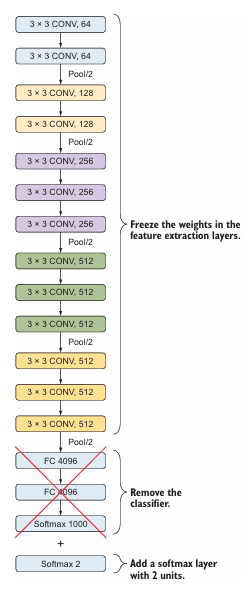

In [ ]:
from keras.applications.vgg16 import VGG16   # 여기서 application.모델명 이라고 볼 수 있음(다양한 모델을 지원)
from keras.layers import Dense, Flatten
from keras.models import Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)) # include_top=False이 기존 가중치를 사용하지 않겠다는 것임
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
x = Flatten()(last_output)
x = Dense(2, activation='softmax', name = 'softmax')(x)
new_model = Model(inputs=base_model.input, outputs=x)
new_model.summary()

In [ ]:
# 뜬금없는데 gpt4 학습에 들어간 비용이 얼마일까?=> 학습비용 수조원이라고 함. 데이터도 조단위...
# https://moon-walker.medium.com/gpt-4%EC%9D%98-%EC%84%B8%EB%B6%80-%EC%A0%95%EB%B3%B4%EA%B0%80-%EC%9C%A0%EC%B6%9C%EB%90%98%EB%8B%A4-db00d6a13f6
# 위 주소를 보면 조단위까지는 아닌듯함.
# 시간당 25000달러..약 100일..그럼 2400시간 * 25000달러

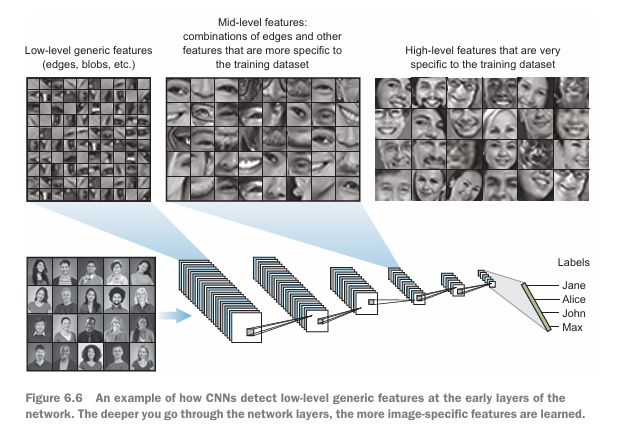

In [4]:
# 위 그림을 기준으로 왼쪽에 있을수록 재사용이 용이하며 오른쪽으로 갈수록 재사용이 어려움(학습의 진행도가 커짐)
# 미세조정(파인튜닝)을 할 때는 학습률을 작게하는 것이 일반적임
# 학습률을 크게 한다는 것은 기존의 만들어진 특징에 대해 큰 변화
# 작게 주면 특징의 변화를 적게 하겠다는 것임
# 근데 파인튜닝은 기존의 특징을 가져와서 사용하겠다는 것임. 이는 가중치가 최적화가 이미 되어 있는 상태이므로
# 약간의 수정만으로도 도형을 만들 수 있음
# 기존의 데이터에 비해서 데이터가 적으면 파인튜닝의 학습률을 낮춰야 함
# 어느 레벨에서 파인튜닝을 진행했다는 그런 내용을 입력하는 것이 필요함(이것으로도 박사학위 논문을 쓸 정도라고 하심)

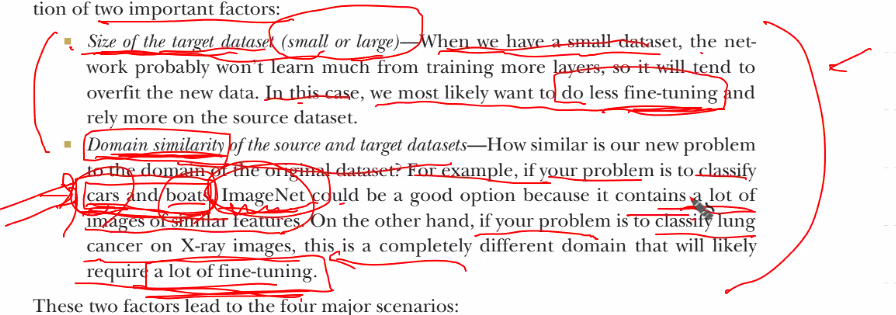
위 그림이 파인튜닝에 관한 내용중 중요한 내용이 될 듯

In [5]:
# 사람얼굴분류기(홍길동/임꺽정) -> 사람얼굴분류기(손흥민/임꺽정)
# 1. 목표 데이터셋이 작을 때 유사한 도메인을 가질경우, 특징추출기를 그대로 사용하자
# 2. 목표 데이터셋이 많을 때(충분할 때) 미세조정을 진행
# 3. 목표 데이터셋이 적고 도메인이 다를 때(얼굴분류가 아닌 xray분류라면) 신경망의 뒷부분을 미세조정
# 4. 목표 데이터셋이 많고 도메인이 다를 때 중간부분부터 파인튜닝을 진행

In [ ]:
# YOLO 인식할 때 MS COCO라는 데이터셋을 이용함
# image classification(이미지 분류) vs object detection(객체 탐지)